# Author : Loka Akash Reddy

# Technical Task 3 : Exploratory Data Analysis- Retail

# GRIP @ The Sparks Foundation

## In this task, We will perform 'Exploratory Data Analysis' on dataset - ‘SampleSuperstore’. As a business manager , we will try to find out the weak areas where we can work to make more profit . Also , What all business problems we can derive by exploring the data.

## Importing the libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [3]:
data = pd.read_csv("SampleSuperstore.csv")

## Reading the dataset

In [4]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


## Checking the dataset dimension

In [6]:
data.shape

(9994, 13)

## Display Summary

In [7]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Checking Null Values

In [8]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## Information about dataset 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [10]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [11]:
data.duplicated().sum()

17

In [12]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [13]:
data['Postal Code'] = data['Postal Code'].astype('object')

In [14]:
data.drop_duplicates(subset=None,keep='first',inplace=True)
data.duplicated().sum()

0

In [15]:
cor = data.corr()
cor

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


<AxesSubplot:>

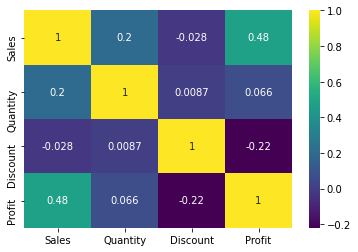

In [16]:
sns.heatmap(cor,annot=True,cmap='viridis')

## Dropping postal code columns

In [17]:
data = data.drop(['Postal Code'],axis=1)

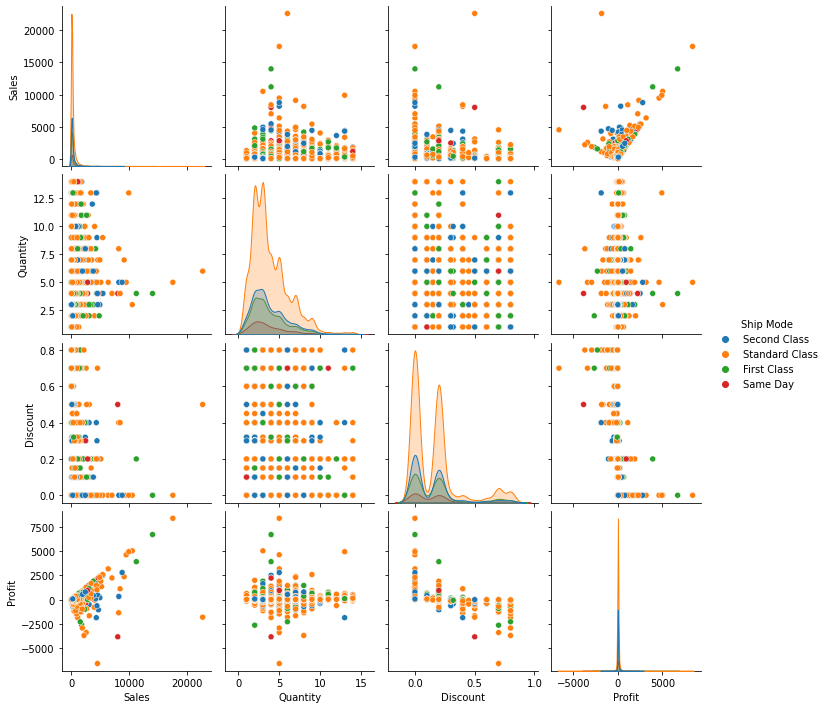

In [18]:
sns.pairplot(data,hue='Ship Mode')

In [19]:
data['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

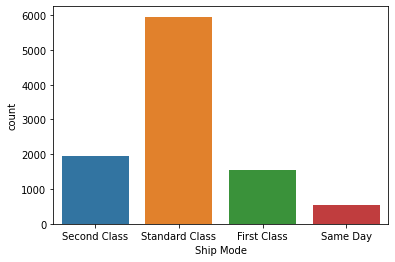

In [20]:
sns.countplot(x=data['Ship Mode'])

## Value counts for segment 

In [21]:
data['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

## Plotting pair plot

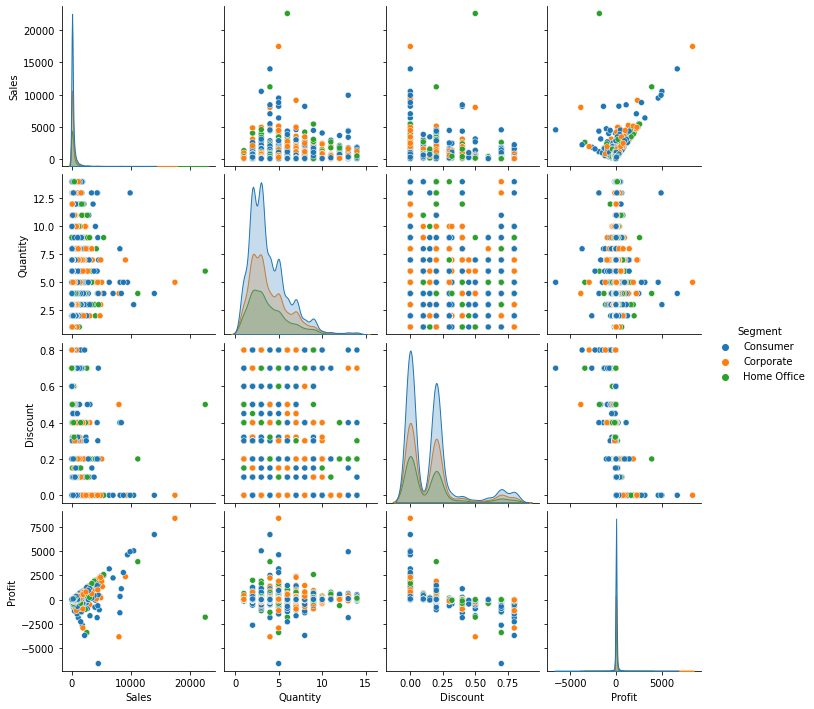

In [22]:
sns.pairplot(data,hue='Segment')

<AxesSubplot:xlabel='Segment', ylabel='count'>

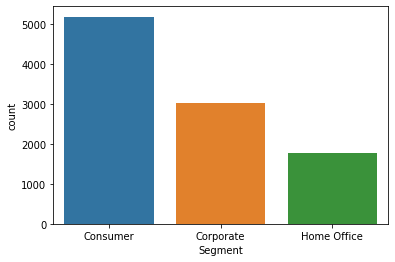

In [23]:
sns.countplot(x='Segment',data=data)

In [24]:
data['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

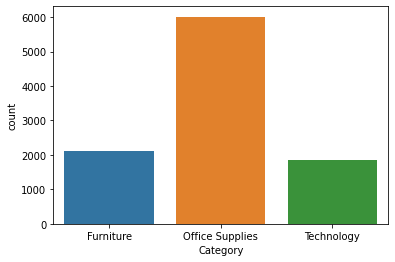

In [25]:
sns.countplot(x='Category',data=data,palette='tab10')

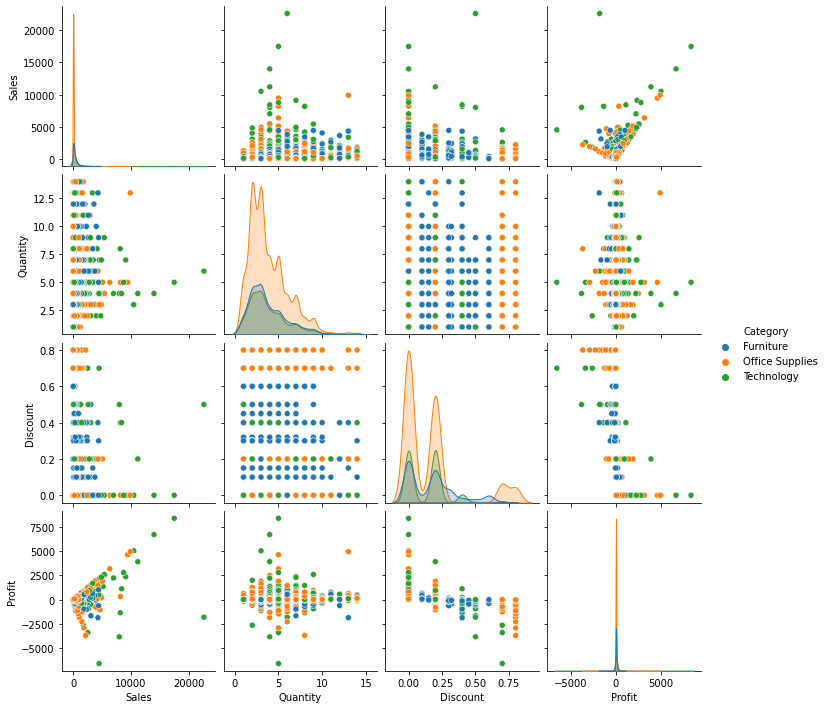

In [26]:
sns.pairplot(data,hue='Category')

In [27]:
data['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

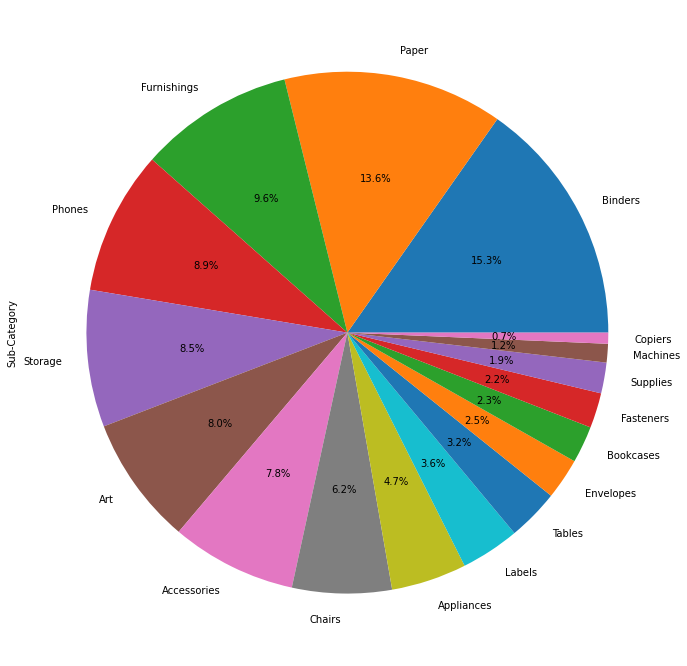

In [28]:
plt.figure(figsize=(15,12))
data['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

# Observation 1

### Maximum are from binders, paper, furnishings , phones, storage, art and accessories.

### Minimum are from copiers, machines and suppliers.

In [29]:
data['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

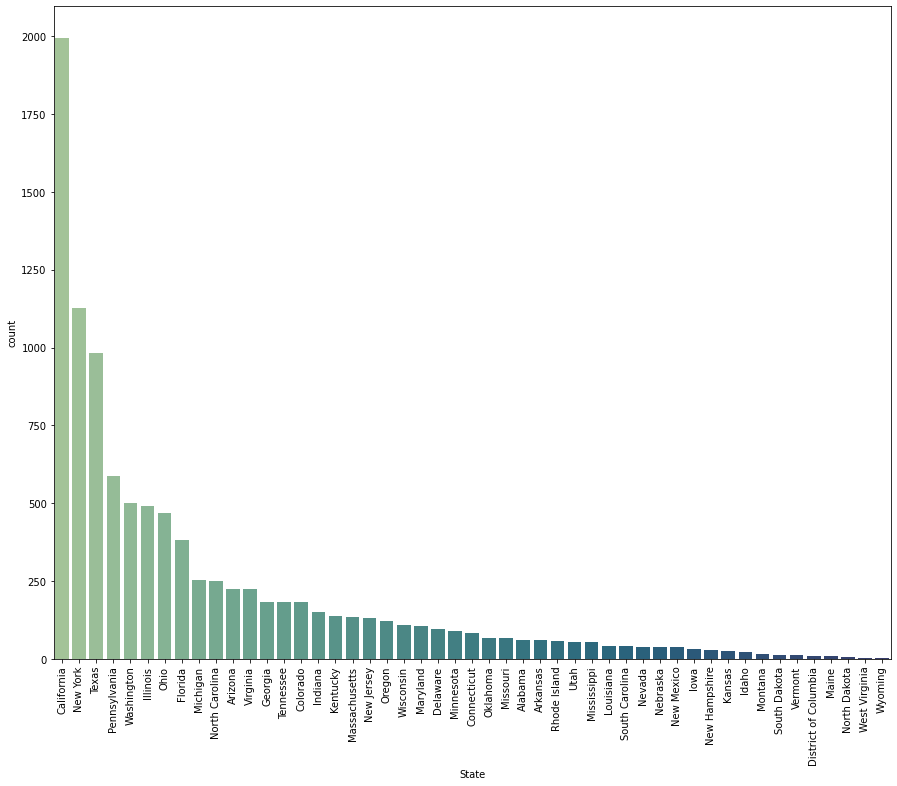

In [30]:
plt.figure(figsize=(15,12))
sns.countplot(x='State',data=data,palette='crest',order=data['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

# Observation 2

### Highest number of buyers are from California and New York.

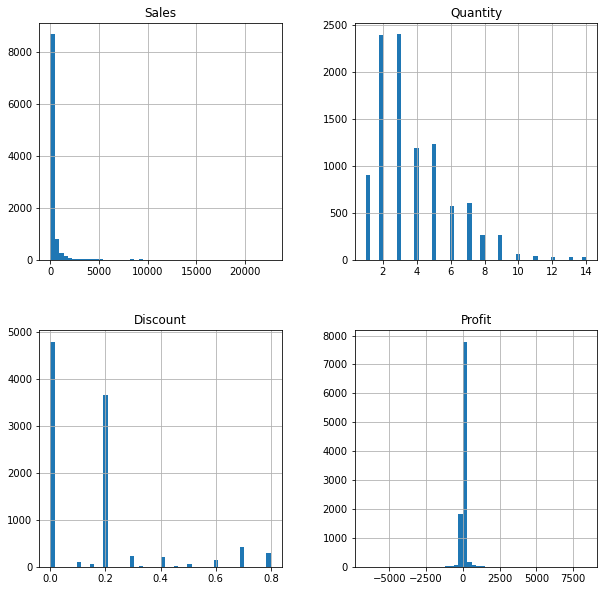

In [31]:
data.hist(figsize=(10,10),bins=50)
plt.show()

# Observation 3

### 1) Most customers tend to buy goods of quantity 2 and 3.

### 2) Maximum discount given is between 0 to 20 percent.

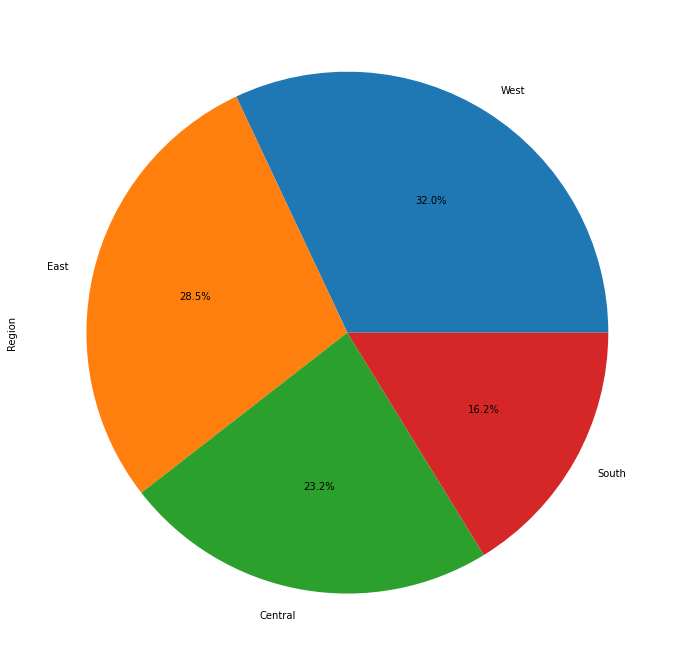

In [32]:
plt.figure(figsize=(15,12))
data['Region'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

# Profit vs Discount

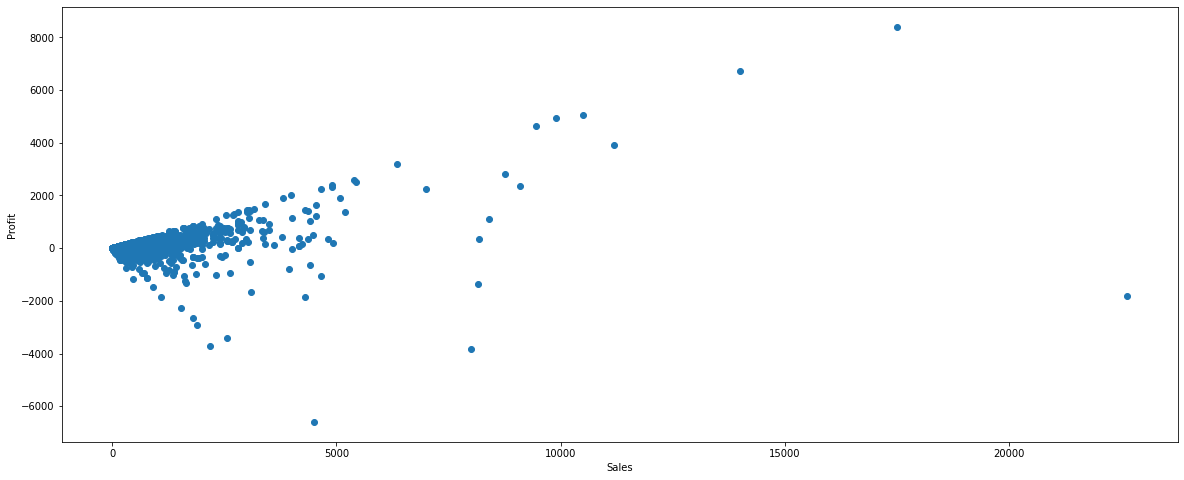

In [33]:
fig,ax=plt.subplots(figsize=(20,8))
ax.scatter(data['Sales'],data['Profit'])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

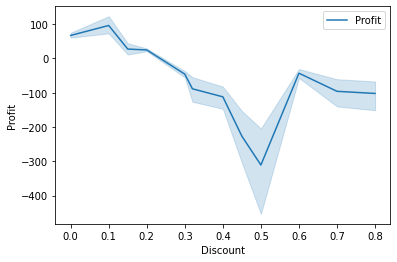

In [34]:
sns.lineplot(x='Discount',y='Profit',label='Profit',data=data)
plt.legend()
plt.show()

# Observation 4

### 1) No correlation between profit and discount.

# Profit vs Quantity

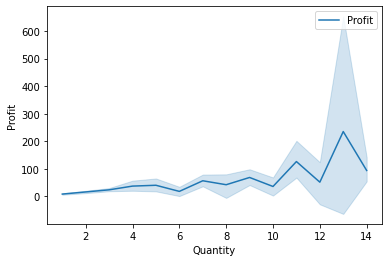

In [35]:
sns.lineplot(x='Quantity',y='Profit',label='Profit',data=data)
plt.legend()
plt.show()

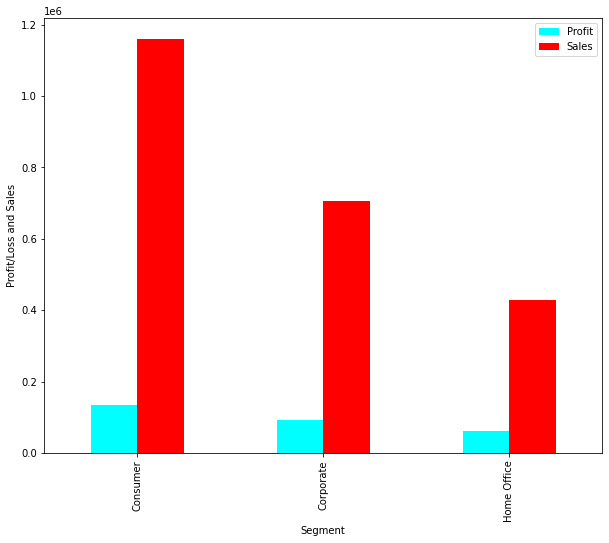

In [36]:
data.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['cyan','red'],figsize=(10,8))
plt.ylabel('Profit/Loss and Sales')
plt.show()

# Observation 5

### 1) Profit and Sales are maximum in consumer segment and minimum in home office segment.

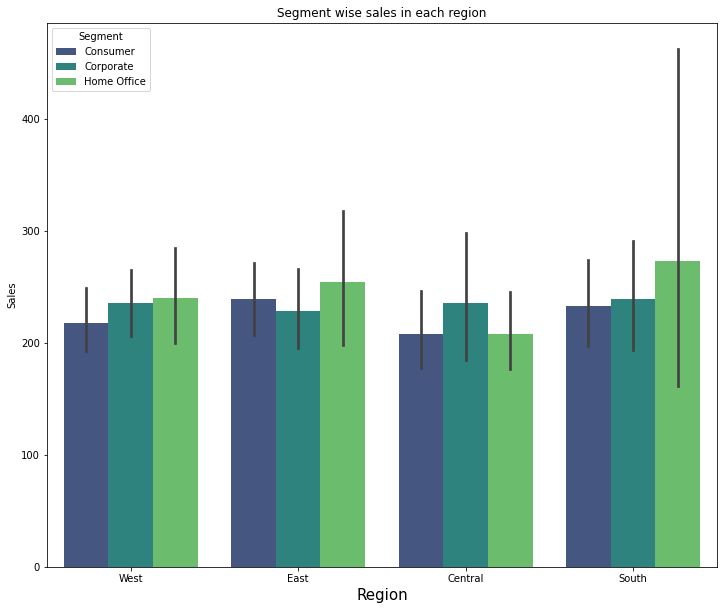

In [37]:
plt.figure(figsize=(12,10))
plt.title('Segment wise sales in each region')
sns.barplot(x='Region',y='Sales',data=data,hue='Segment',order=data['Region'].value_counts().index,palette='viridis')
plt.xlabel('Region',fontsize=15)
plt.show()

# Observation 6

### 1) Segment wise sales are almost same in every region.

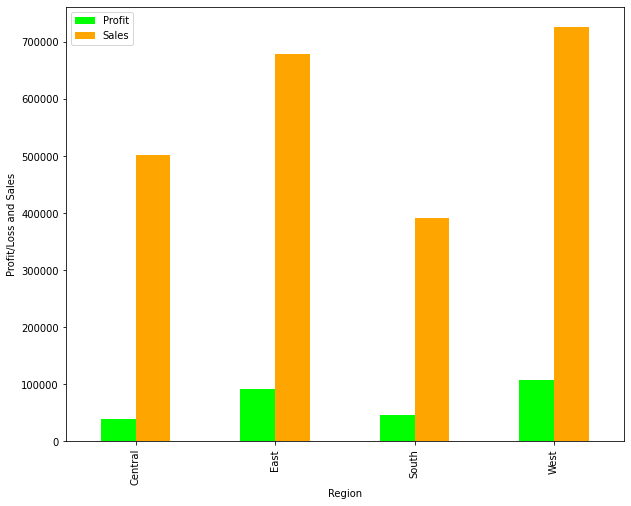

In [38]:
data.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['lime','orange'],figsize=(10,8))
plt.ylabel('Profit/Loss and Sales')
plt.show()

# Observation 7

### 1) Profit and sales are maximum in west region and minimum in south region.

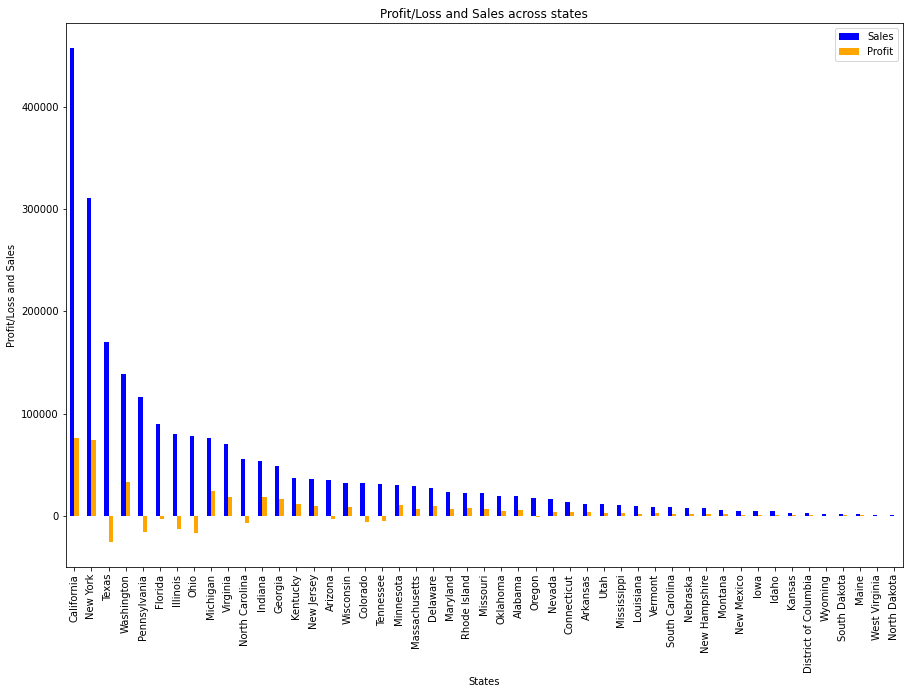

In [39]:
ps = data.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['blue','orange'],figsize=(15,10))
plt.title('Profit/Loss and Sales across states')
plt.xlabel('States')
plt.ylabel('Profit/Loss and Sales')
plt.show()

# Observation 8

### 1) High profit in California and New York.

### 2) Loss in Texas, Pennsylvania, Illionis, Ohio.

In [40]:
t_states = data["State"].value_counts().nlargest(10)
t_states

California        1996
New York          1127
Texas              983
Pennsylvania       586
Washington         502
Illinois           491
Ohio               468
Florida            383
Michigan           254
North Carolina     249
Name: State, dtype: int64

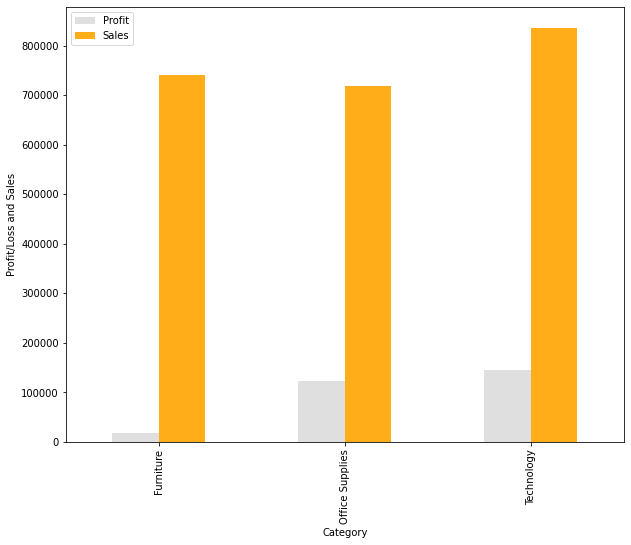

In [41]:
data.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['gainsboro','orange'],alpha=0.9,figsize=(10,8))
plt.ylabel('Profit/Loss and Sales')
plt.show()

# Observation 9

### As a business manager, try to find out the weak areas where you can work to make more profit.

### 1) Technology and Office supplies have high profit.

### 2) Furnitures have less profit.

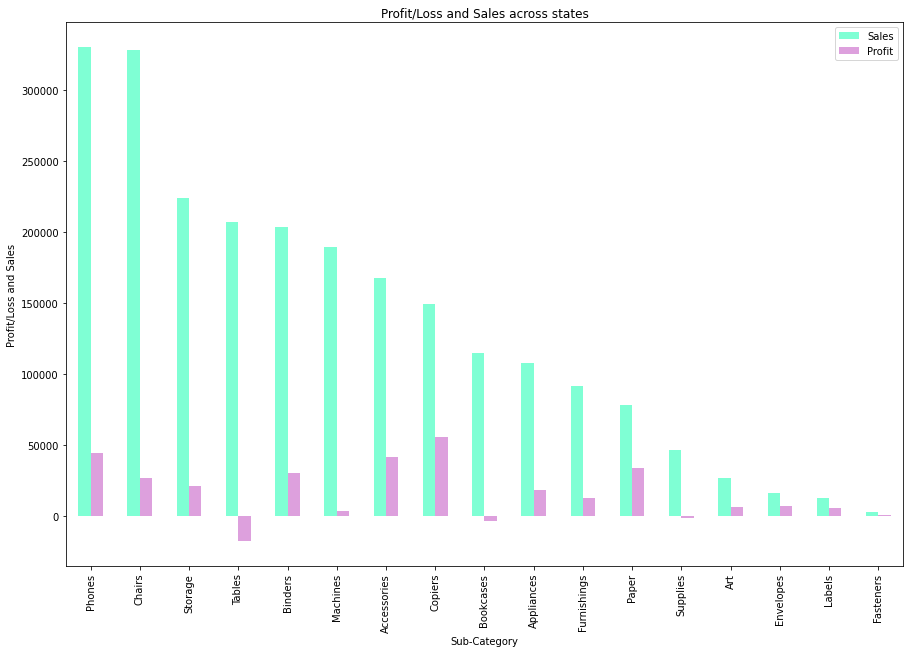

In [42]:
ps = data.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['aquamarine','plum'],figsize=(15,10))
plt.title('Profit/Loss and Sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/Loss and Sales')
plt.show()

# Observation 10

### 1) Phones sub-category have high sales.

### 2) Chairs have high sales but less profit compared to phones.

### 3) Tables and bookmarks sub-categories facing loss.



# TASK COMPLETED
